## Import needed libraries and pakages 

In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC

from sklearn.metrics import r2_score

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy, MeanAbsoluteError
from keras.models import Sequential
from keras.layers import Dense 
from keras import backend as K

## Read data and explore it

In [2]:
def read_data(src):
    
    data = pd.read_csv(src)
    return data

source = "data/HousingData.csv"
df = read_data(source)

In [3]:
def explore_data(data):
    
    print(f"Shape of the data: {data.shape}\n")
    
    print("Data information:")
    display(data.info())
    
    print(f"\nNumber of null values in each column:\n{data.isnull().sum()}\n")
    
    print("Data Samples:")
    display(data.head())
    
    print("Data descriptive statistics:")
    display(data.describe())
    
explore_data(df)

Shape of the data: (506, 14)

Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


None


Number of null values in each column:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

Data Samples:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


Data descriptive statistics:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


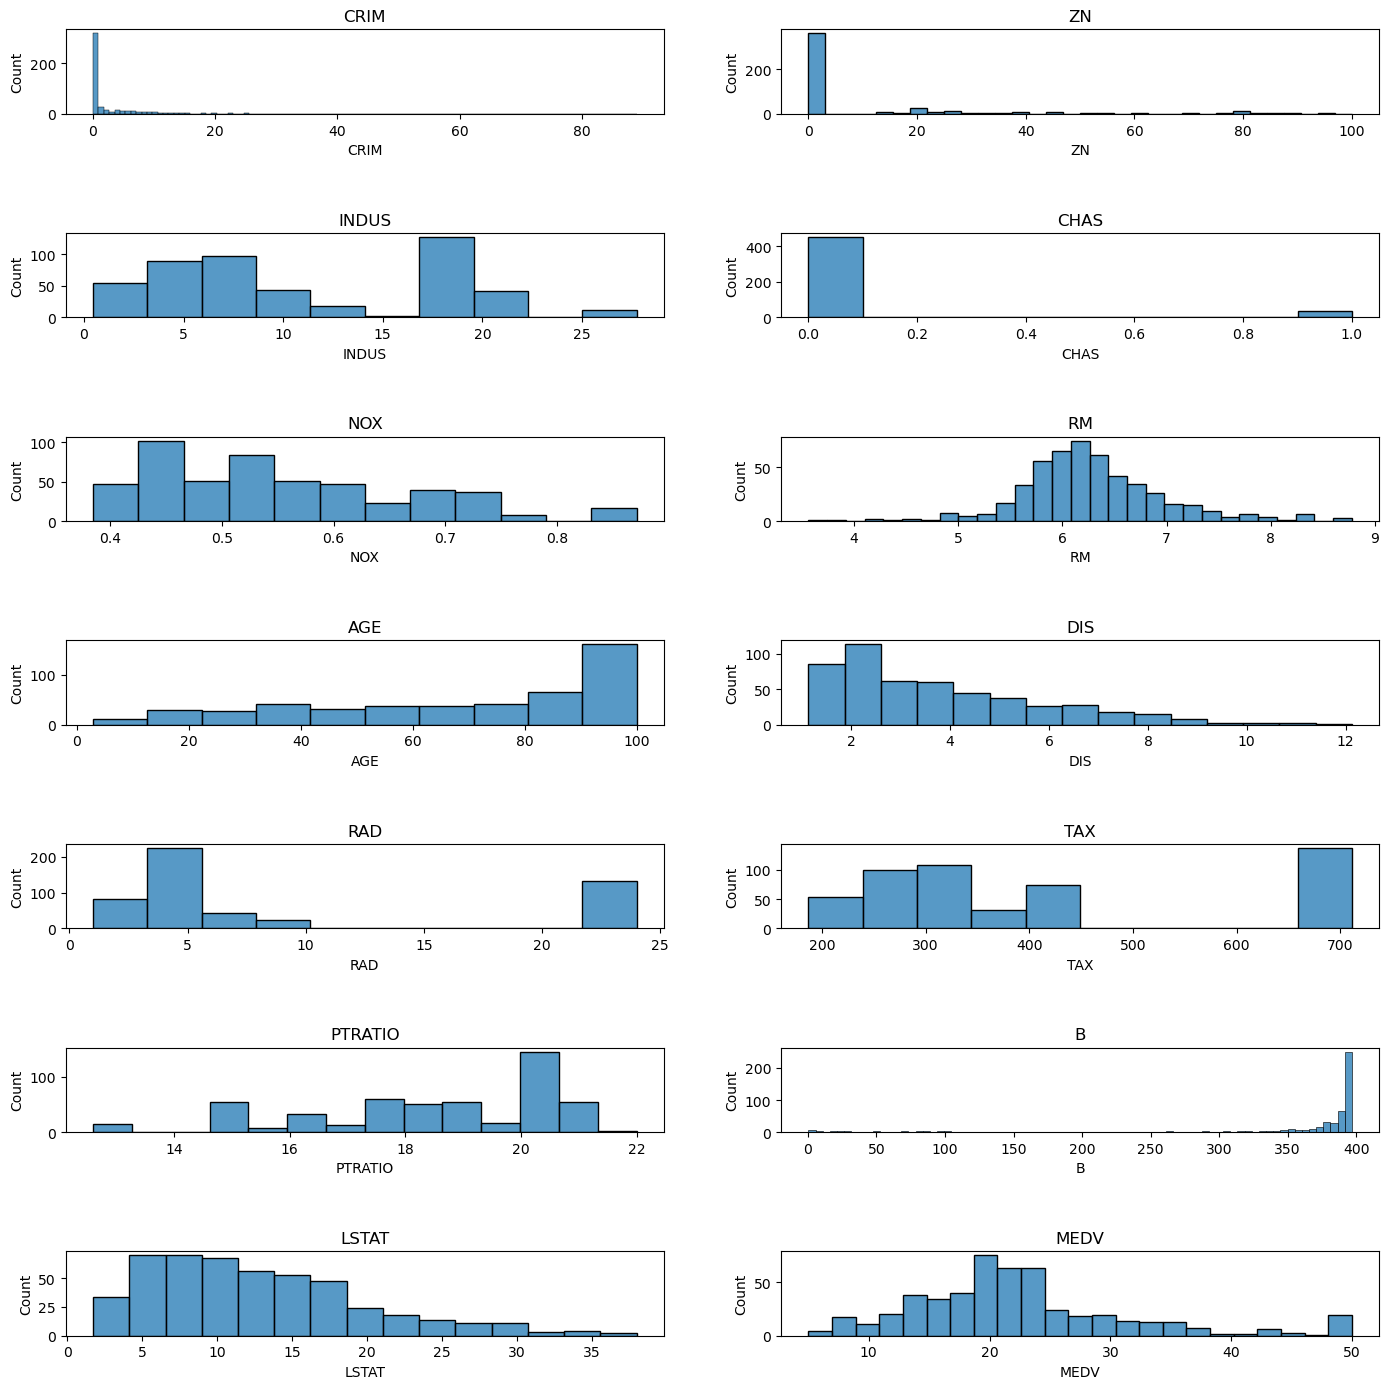

In [4]:
def plot_hist(data):
    fig, axes = plt.subplots(7, 2, figsize=(14, 14))
    ax = axes.flatten()

    for i, col in enumerate(data.columns):
        sns.histplot(data[col], ax=ax[i]) # histogram call
        ax[i].set_title(col)
        # remove scientific notation for both axes
        # ax[i].ticklabel_format(style='plain', axis='both')

    fig.tight_layout(w_pad=4, h_pad=4) # change padding 
    plt.show()
    
plot_hist(df)

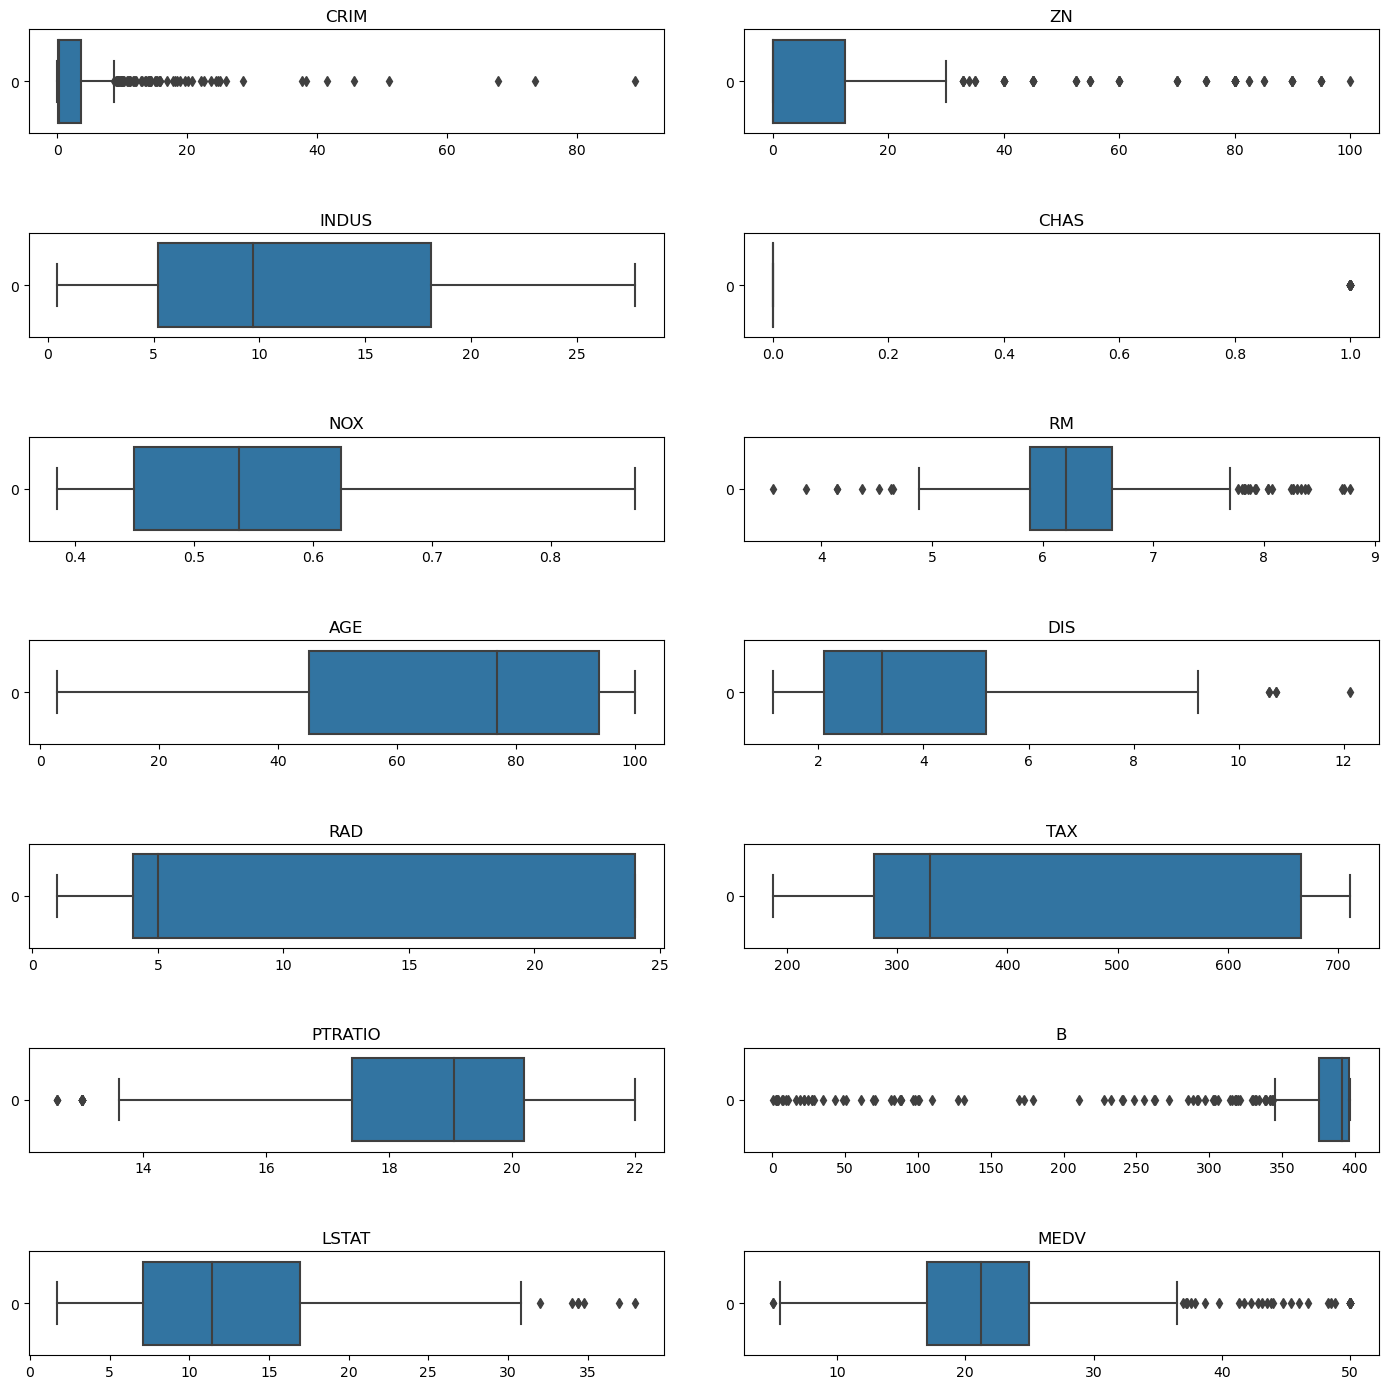

In [5]:
def plot_box(data):
    fig, axes = plt.subplots(7, 2, figsize=(14, 14))
    ax = axes.flatten()

    for i, col in enumerate(data.columns):
        sns.boxplot(data[col], ax=ax[i], orient="h") # boxplot call
        ax[i].set_title(col)

    fig.tight_layout(w_pad=4, h_pad=4) # change padding 
    plt.show()
    
plot_box(df)

### Data Cleaning and preprocessing

#### Handling missing values 

##### Notes: (selected by trying to affect the descriptive statistics for each column)
- `CRIM`, `ZN`, `INDUS`, `CHAS`, `AGE`, `LSTAT`: I will use the mean to fill the missing values of them

In [6]:
df = df.fillna(df.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


#### Handling outliers

In [7]:
X = df.iloc[:, :-1]
y = df["MEDV"]

In [8]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432


In [9]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [10]:
#function for detect outliers in data , base on IQR criterion
def outlier_func(x):
    outlier = dict()
    
    for col in x.columns:
        q3 , q1 = np.percentile(x[col] , [75, 25])
        iqr = q3 - q1
        lower_boundary = q1 - 1.5 * iqr
        upper_boundary = q3 + 1.5 * iqr
        outlier[col] = [lower_boundary, upper_boundary]
        
    return outlier 

df_x = X.drop(['CHAS'], axis=1)
boundaries = outlier_func(df_x)
print(boundaries)

{'CRIM': [-5.2097234567901225, 8.90483242798354], 'ZN': [-16.8179012345679, 28.0298353909465], 'INDUS': [-14.175, 37.465], 'NOX': [0.18650000000000005, 0.8865], 'RM': [4.778499999999999, 7.730500000000001], 'AGE': [-25.549999999999997, 165.04999999999998], 'DIS': [-2.5322000000000005, 9.820800000000002], 'RAD': [-26.0, 54.0], 'TAX': [-301.5, 1246.5], 'PTRATIO': [13.199999999999998, 24.4], 'B': [344.10624999999993, 427.49625000000003], 'LSTAT': [-6.78, 30.58]}


In [11]:
# function to impute the outliers with the boundaries
def handle_outliers(x, boundaries):
    for col in x.columns:
        x.loc[x[col] <= boundaries[col][0], col] = boundaries[col][0]
        x.loc[x[col] >= boundaries[col][1], col] = boundaries[col][1]
    return x


df_new = handle_outliers(df_x, boundaries)

In [12]:
df_new = pd.concat([df_new, X["CHAS"]], axis=1)
df_new.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2.228077,6.523256,11.083992,0.554695,6.275312,68.518519,3.783947,9.549407,408.237154,18.463834,381.918836,12.654148,0.069959
std,3.193534,10.810961,6.699165,0.115878,0.630242,27.439466,2.069765,8.707259,168.537116,2.143924,19.054913,6.831667,0.250233
min,0.006320,0.000000,0.460000,0.385000,4.778500,2.900000,1.129600,1.000000,187.000000,13.200000,344.106250,1.730000,0.000000
25%,0.083235,0.000000,5.190000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,0.000000
50%,0.290250,0.000000,9.900000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,0.000000
75%,3.611874,11.211934,18.100000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,0.000000
max,8.904832,28.029835,27.740000,0.871000,7.730500,100.000000,9.820800,24.000000,711.000000,22.000000,396.900000,30.580000,1.000000


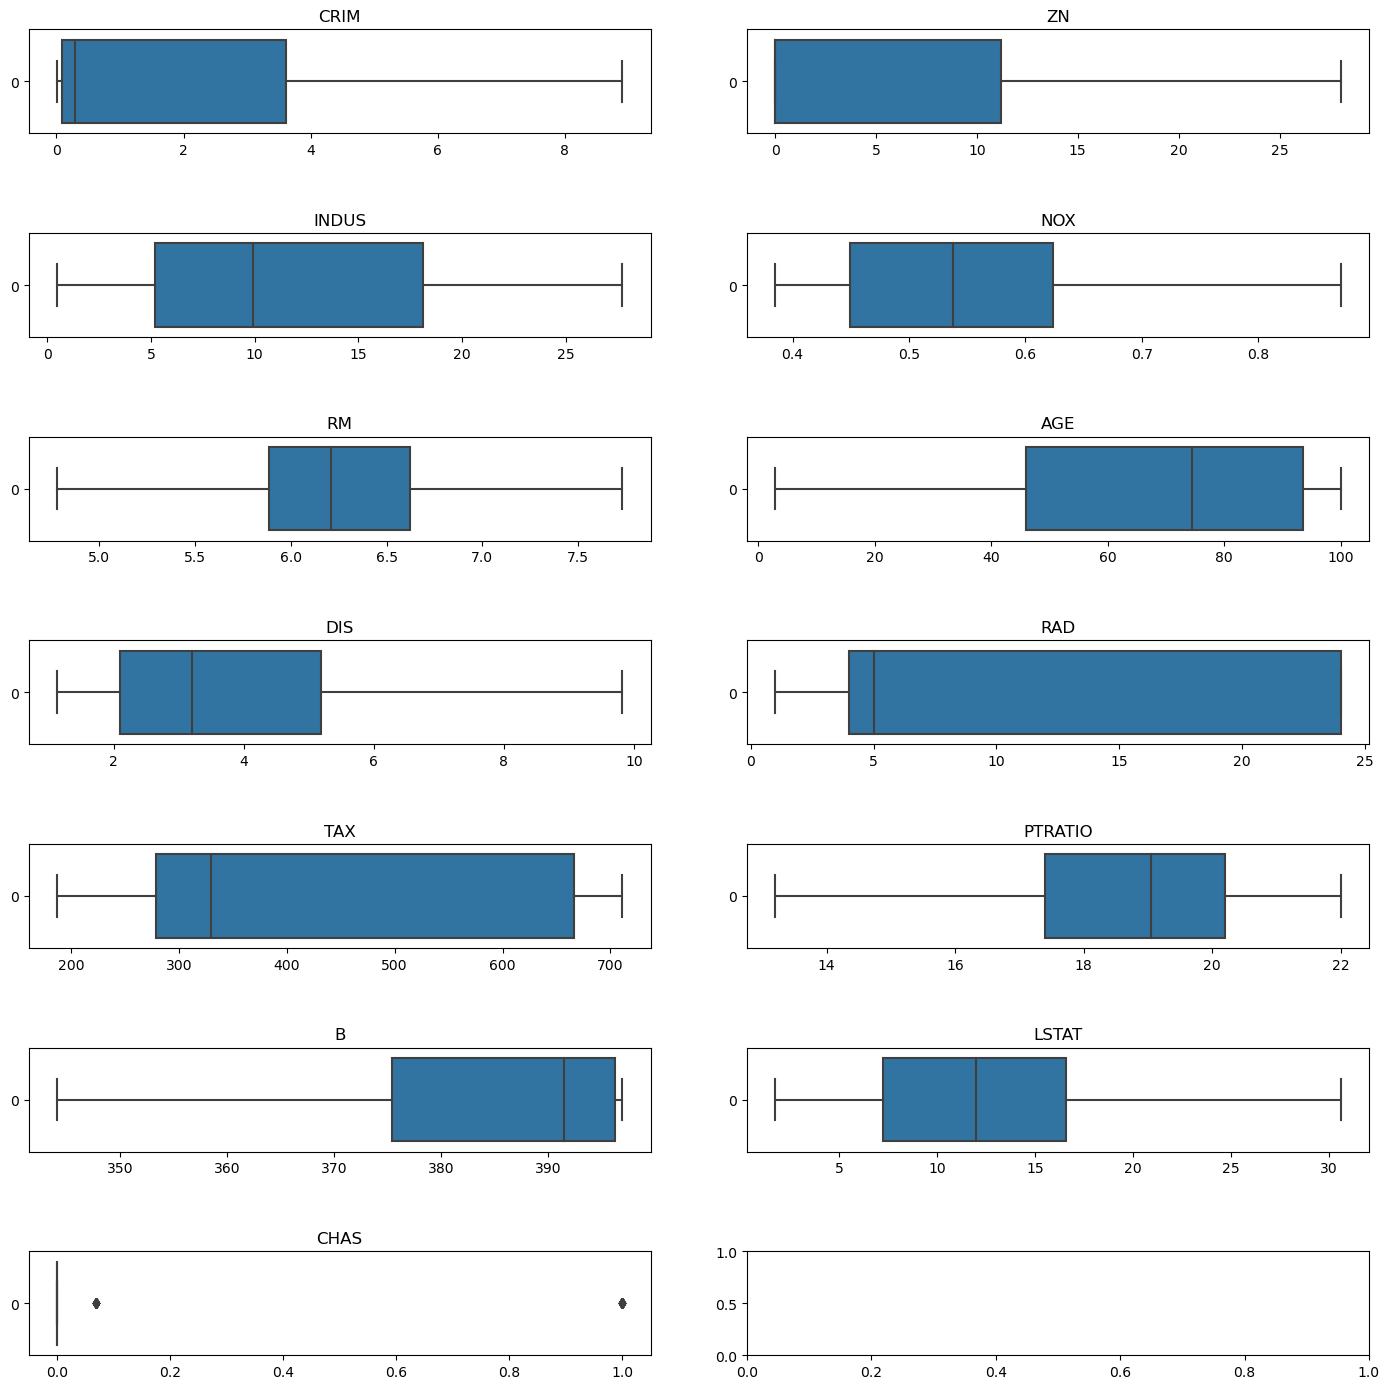

In [13]:
plot_box(df_new)

#### Scaling data

In [14]:
def scale_data(data, columns):
    scaled_cols = list(columns)
    scaler_transformer = make_column_transformer((StandardScaler(), 
                                                  scaled_cols), 
                                                 remainder="passthrough")

    scaled = scaler_transformer.fit_transform(data[scaled_cols])
    scaled_df = pd.DataFrame(scaled, index=data.index, columns=scaled_cols)
    return scaled_df

df_scaled = scale_data(df_new, df_new.columns)
df_scaled.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS
0,-0.696393,1.062635,-1.311010,-0.144217,0.475982,-0.121059,0.148015,-0.982843,-0.666608,-1.477181,0.786988,-1.124432,-0.279851
1,-0.689814,-0.603990,-0.599771,-0.740262,0.231390,0.378716,0.572202,-0.867883,-0.987329,-0.309941,0.786988,-0.514900,-0.279851
2,-0.689820,-0.603990,-0.599771,-0.740262,1.444822,-0.270627,0.572202,-0.867883,-0.987329,-0.309941,0.573183,-1.263628,-0.279851
3,-0.688228,-0.603990,-1.330435,-0.835284,1.147817,-0.828770,1.101820,-0.752922,-1.106115,0.110265,0.667741,-1.423337,-0.279851
4,-0.676731,-0.603990,-1.330435,-0.835284,1.384468,-0.522338,1.101820,-0.752922,-1.106115,0.110265,0.786988,0.008980,-0.279851


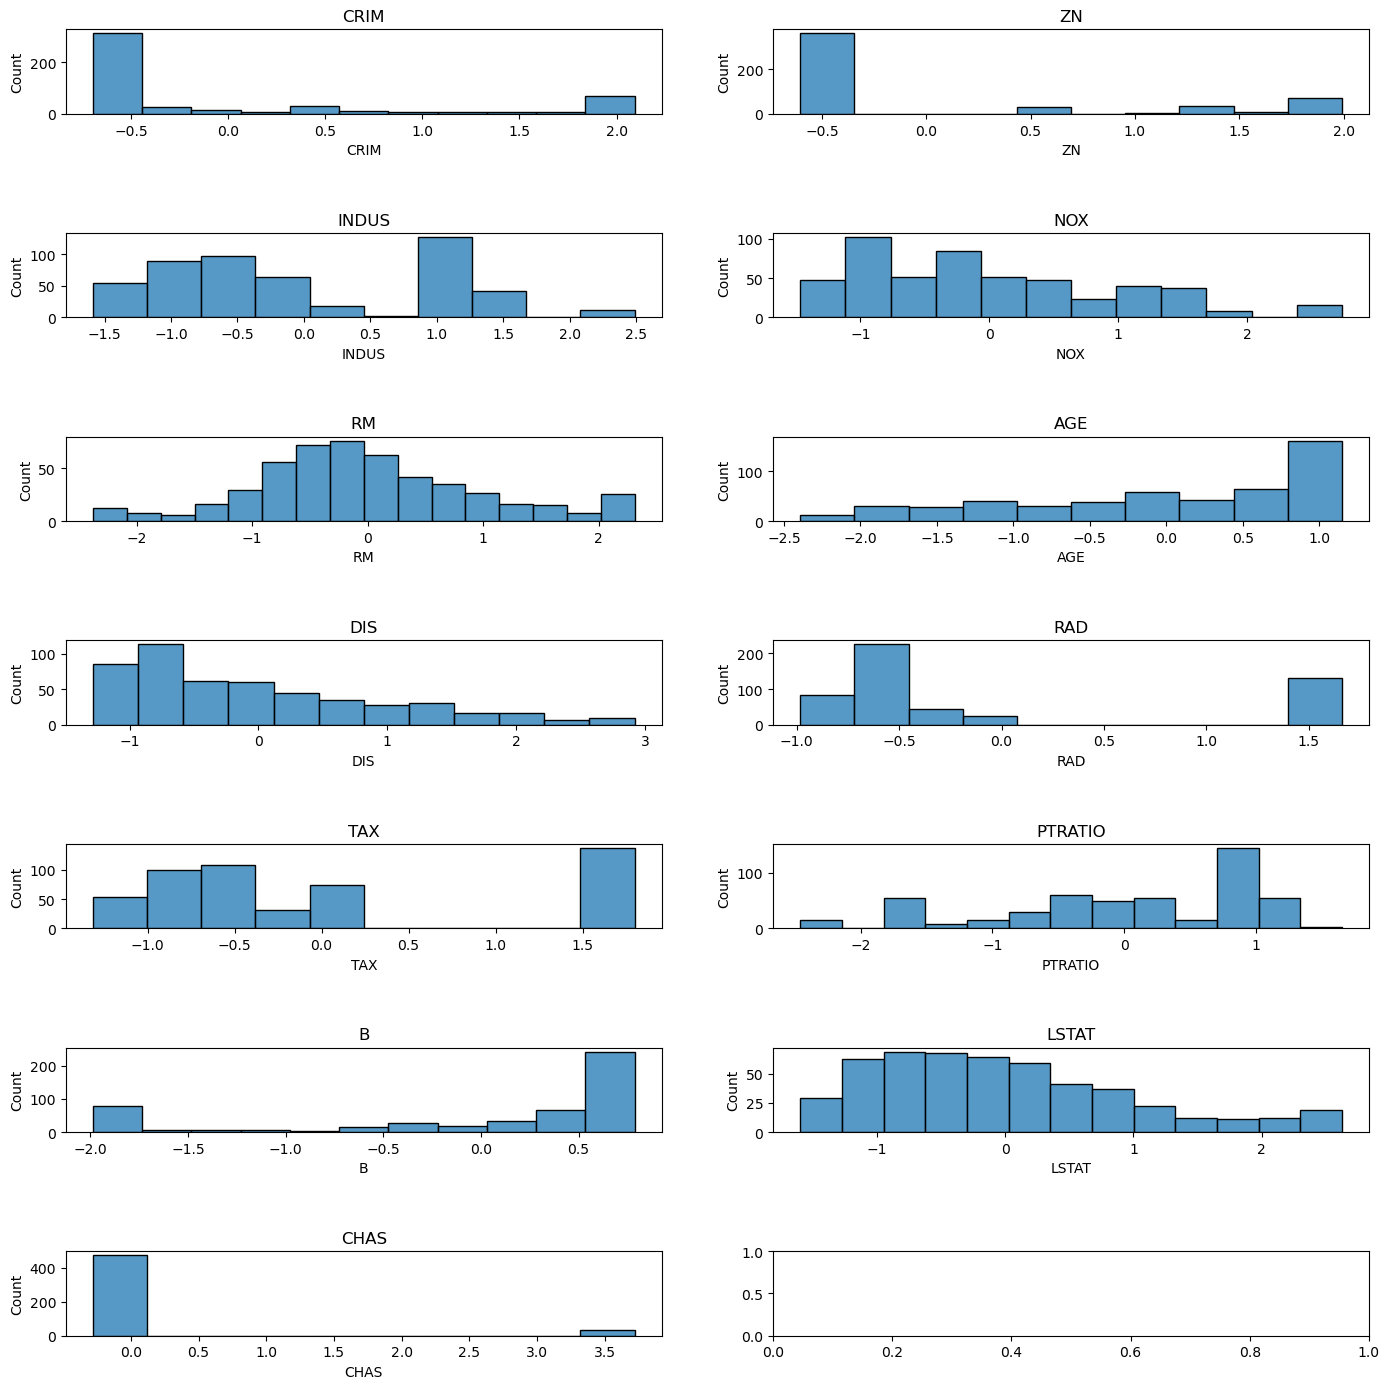

In [15]:
plot_hist(df_scaled)

##### Note: We can use log scale to optimize the distribution


## Modeling

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, 
                                                    test_size=0.2, 
                                                    random_state=3)

In [17]:
def train_model(model, X_train, y_train, X_test, y_test):
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2_scr = r2_score(y_test, y_pred)

    return (r2_scr * 100)

### 1. Linear Regression

In [18]:
reg_r2 = train_model(LinearRegression(), X_train, y_train, X_test, y_test)
print(f"R2 score of the linear regression: {reg_r2:.2f}")

R2 score of the linear regression: 77.68


### 2. Decision Tree

In [19]:
tree_r2 = train_model(DecisionTreeRegressor(max_depth=11, 
                                            random_state=3), 
                      X_train, y_train, X_test, y_test)

print(f"R2 score of the Decision Tree regressor: {tree_r2:.2f}")

R2 score of the Decision Tree regressor: 82.90


### 3. Random Forest

In [20]:
rf_r2 = train_model(RandomForestRegressor(n_estimators=100, 
                                          random_state=3,
                                          min_samples_leaf=10), 
                      X_train, y_train, X_test, y_test)

print(f"R2 score of the Random Forest regressor: {rf_r2:.2f}")

R2 score of the Random Forest regressor: 88.55


### 4. NN 

In [21]:
nn_model = Sequential()
nn_model.add(Dense(32, input_dim=13, activation="relu"))
nn_model.add(Dense(16, activation="relu"))
nn_model.add(Dense(8, activation="relu"))
nn_model.add(Dense(1, activation="linear"))
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [22]:
nn_model.compile(loss="mse", optimizer=Adam(learning_rate=0.05))
result = nn_model.fit(X_train, y_train, epochs=100, batch_size=64,
                      validation_data=(X_test,y_test), validation_split=0.4)

Epoch 1/100
7/7 [==============================] - 3s 153ms/step - loss: 418.1687 - val_loss: 293.9849
Epoch 2/100
7/7 [==============================] - 0s 23ms/step - loss: 148.3279 - val_loss: 119.9788
Epoch 3/100
7/7 [==============================] - 0s 22ms/step - loss: 79.2148 - val_loss: 60.7257
Epoch 4/100
7/7 [==============================] - 0s 30ms/step - loss: 46.7507 - val_loss: 33.1574
Epoch 5/100
7/7 [==============================] - 0s 23ms/step - loss: 33.0242 - val_loss: 24.8615
Epoch 6/100
7/7 [==============================] - 0s 22ms/step - loss: 27.8664 - val_loss: 22.1735
Epoch 7/100
7/7 [==============================] - 0s 30ms/step - loss: 24.8882 - val_loss: 17.2062
Epoch 8/100
7/7 [==============================] - 0s 20ms/step - loss: 19.9207 - val_loss: 15.9394
Epoch 9/100
7/7 [==============================] - 0s 33ms/step - loss: 19.0988 - val_loss: 11.6367
Epoch 10/100
7/7 [==============================] - 0s 33ms/step - loss: 16.6289 - val_loss: 11

In [23]:
y_pred_nn = nn_model.predict(X_test)
nn_r2 = r2_score(y_test, y_pred_nn) * 100
print(f"R2 score of the NN: {nn_r2:.2f}")

4/4 [==============================] - 0s 5ms/step
R2 score of the NN: 87.37


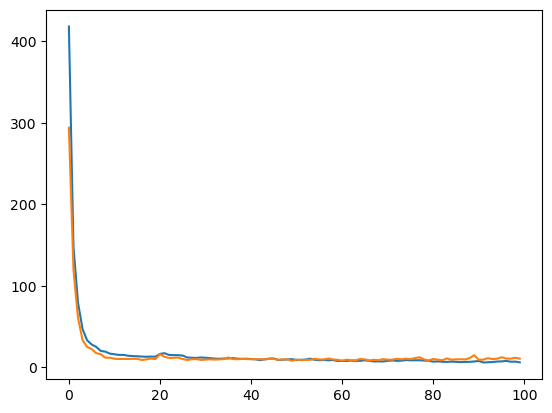

In [24]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])

In [27]:
nn_model.save("model.keras")

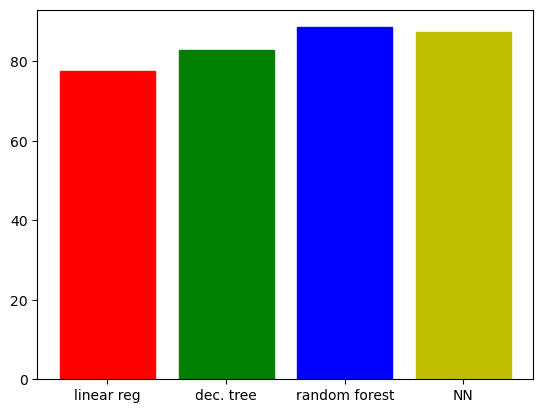

In [26]:
r2_scores = [reg_r2, tree_r2, rf_r2, nn_r2]
names = ["linear reg", "dec. tree", "random forest", "NN"]
barplot = plt.bar(names, r2_scores)
barplot[0].set_color('r')
barplot[1].set_color('g')
barplot[2].set_color('b')
barplot[3].set_color('y')
plt.show()